In [16]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
mlt.rcParams['axes.spines.top'] = False
mlt.rcParams['axes.spines.right'] = False

In [3]:
df = pd.read_csv(r'.\ultimate.csv')
df = df.set_index(pd.DatetimeIndex(df['dtime']))
df = df.drop(columns=['dtime'])
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
dtime,,,,,,,
2013-03-01,7.992424,13.312500,10.017045,20.151515,441.666670,74.448865,1.391667
2013-03-02,34.337121,44.189393,34.644958,61.422287,1025.143927,35.564851,0.616667
2013-03-03,86.500000,121.204545,53.767046,82.691288,1932.155300,24.859848,5.566667
2013-03-04,23.806818,44.028409,20.529482,44.477726,792.371200,62.000000,9.962500
2013-03-05,137.643940,173.712121,77.189394,111.784090,2205.200745,86.757576,6.291667


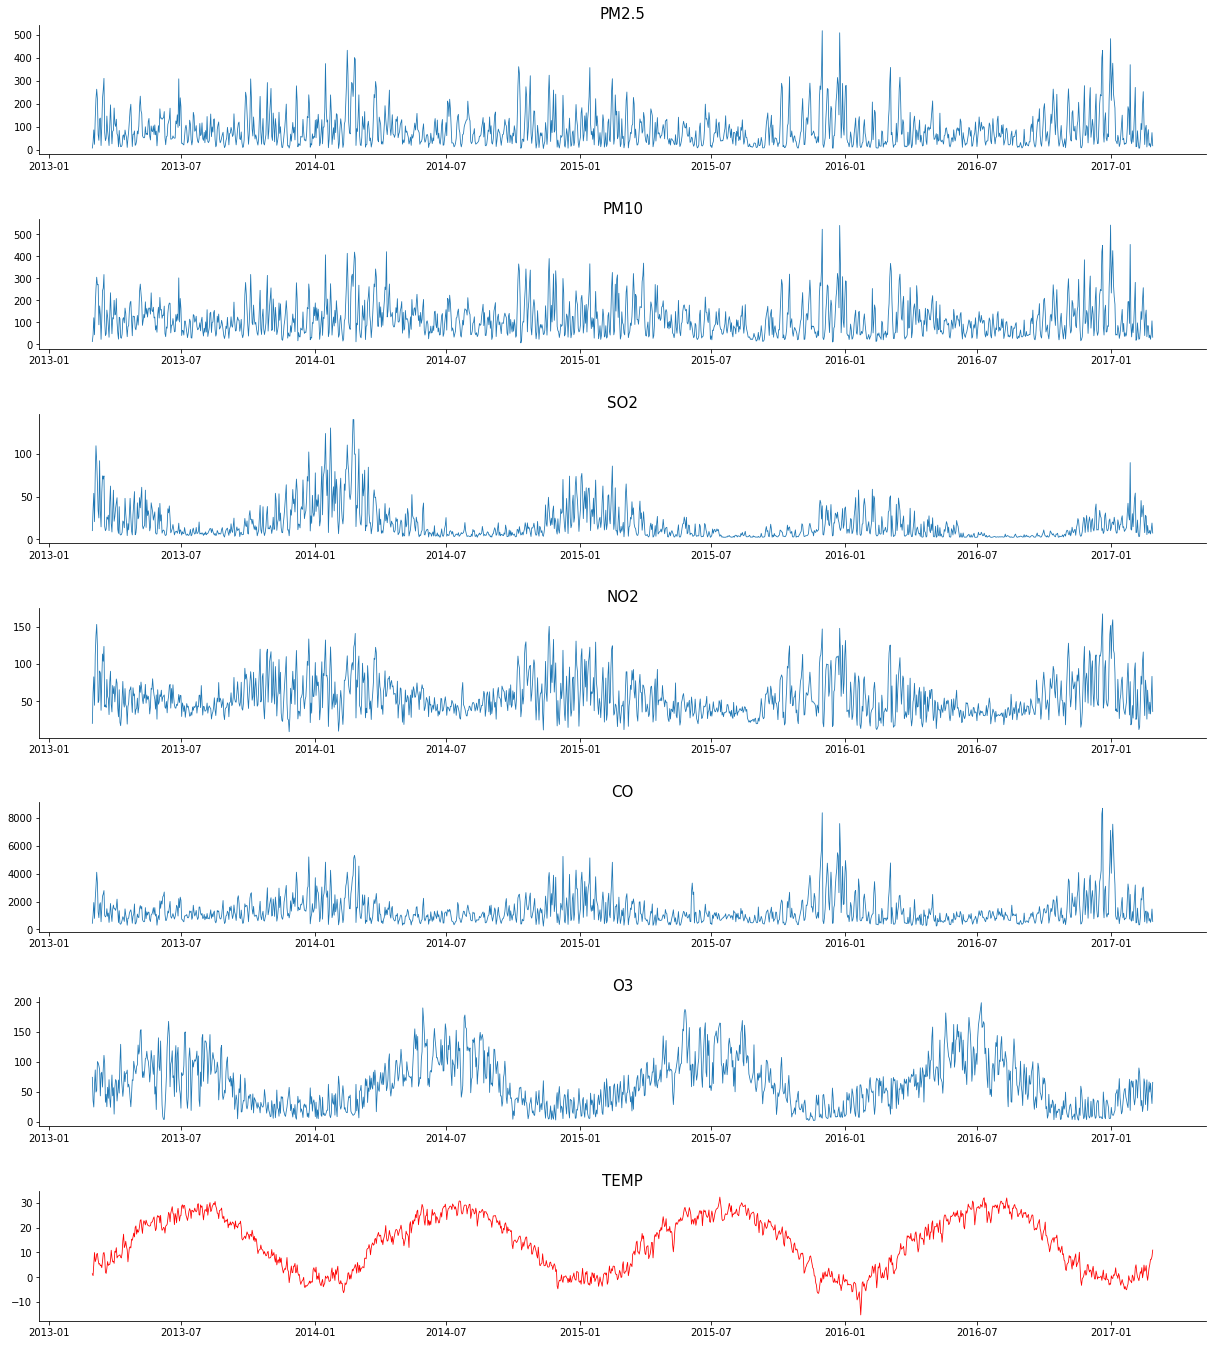

In [4]:
i, columns = 1, df.columns

fig = plt.figure(figsize=(18, 20))
for col in columns:
    ax = fig.add_subplot(len(columns), 1, i)
    ax.set_title(col, size=15)
    ax.plot(df[col], color=f'{"red" if col=="TEMP" else "C0"}', lw=0.8)
    i += 1
fig.subplots_adjust(left=0.1, bottom=0.1, right=1., top=1., wspace=0.5, hspace=0.5)

In [5]:
df_actual = pd.read_csv(r'.\data\actual.csv')

df_actual['dtime'] = pd.to_datetime(df_actual['year'].astype(str) + '-' + \
                                                df_actual['month'].astype(str) + '-' + \
                                                    df_actual['day'].astype(str), format='%Y-%m-%d') 
df_actual = df_actual.set_index(pd.DatetimeIndex(df_actual['dtime']))
df_actual = df_actual.drop(columns=['year', 'month', 'day', 'dtime'])

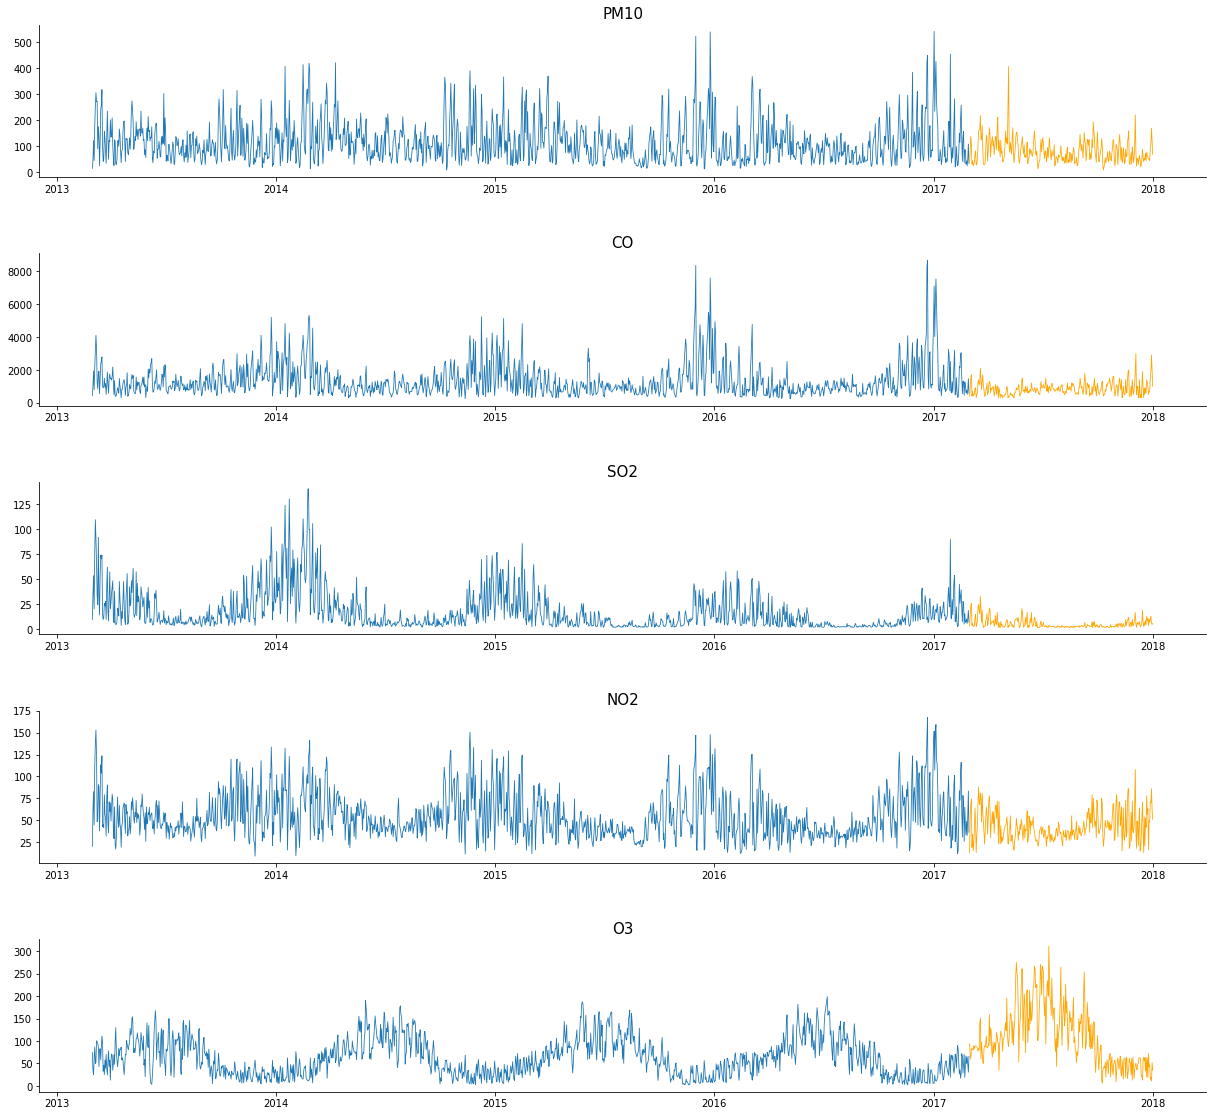

In [6]:
i, columns = 1, df_actual.columns

fig = plt.figure(figsize=(18, 20))
for col in columns[1:]:
    ax = fig.add_subplot(len(columns), 1, i)
    ax.set_title(col, size=15)
    ax.plot(df[col], lw=0.8)
    ax.plot(df_actual[col], lw=0.8, color='orange')
    i += 1
fig.subplots_adjust(left=0.1, bottom=0.1, right=1., top=1., wspace=0.5, hspace=0.5)

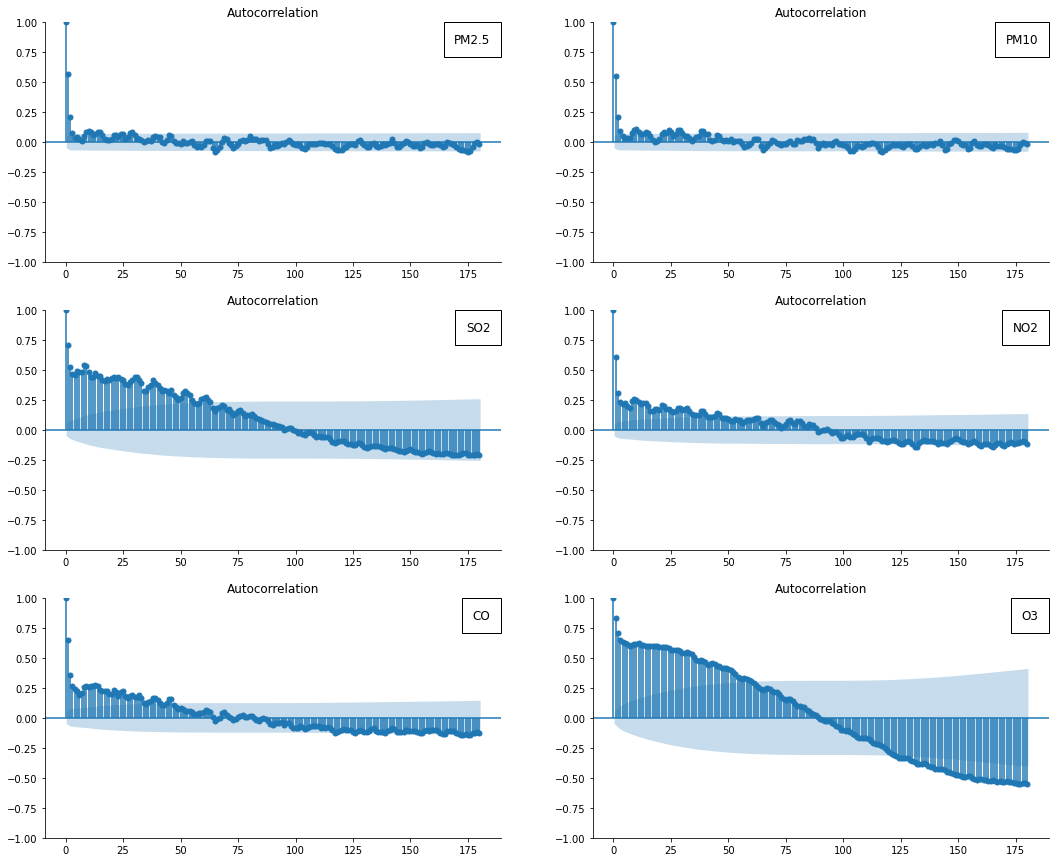

In [25]:
i, columns = 1, df.columns

fig = plt.figure(figsize=(18, 15))
for col in columns[:6]:
    ax = fig.add_subplot(3, 2, i)
    annot = AnchoredText(col, prop=dict(size=12), frameon=True, loc='upper right')
    annot.patch.set_boxstyle('square, pad=0.5')
    plot_acf(df[col], ax=ax, lags=180)
    ax.add_artist(annot)
    i += 1

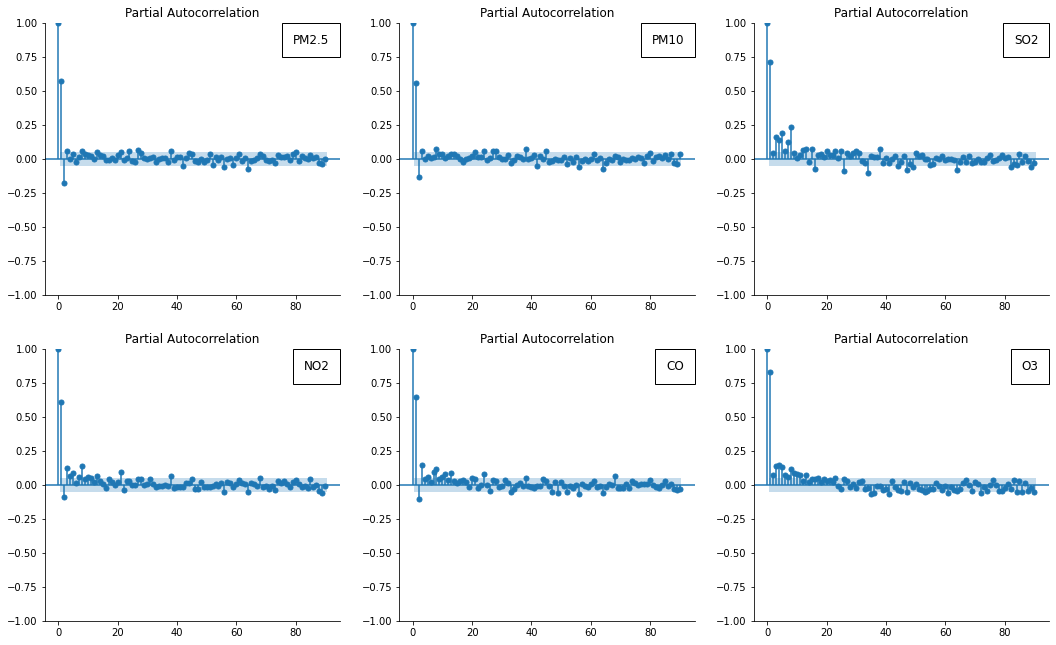

In [28]:
i, columns = 1, df.columns

fig = plt.figure(figsize=(18, 11))
for col in columns[:6]:
    ax = fig.add_subplot(2, 3, i)
    annot = AnchoredText(col, prop=dict(size=12), frameon=True, loc='upper right')
    annot.patch.set_boxstyle('square, pad=0.5')
    plot_pacf(df[col], ax=ax, method='ywm', lags=90)
    ax.add_artist(annot)
    i += 1